In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
import math
import collections
from sklearn.feature_extraction import image
import gc
import os
import pandas as pd

In [2]:
def load_img(path):
    im = Image.open(path).convert('L')
    im2 = np.asarray(im)
    print("Shape"+ str(im2.shape))
    section = [im2]

    return section

In [3]:
# params:
 # sections: Seções da imagem
 # opc: quando verdadeiro salva a imagem do grafo
def calc_weights_default(sections, opc=True, r=2, t=0.9):
    s = 1
    gs = []
    for sec in sections:
        print('Iniciando o grafo da secção %i ...' % (s))
        row = np.size(sec, 0)
        col = np.size(sec, 1)

        i = 0
        j = 0

        G = nx.Graph()

        np.seterr(over="ignore")

        r = 2
        t = 0.9

            # pospx = [i,j] e intespx. representando o pixel
        pxdic = dict()

        print("Iniciando calculo dos pesos...")

        cont = 0
        for i in range(1, row - 2):
            for j in range(1, col - 2):
                 # ind = [i+1, j, i, j+1, i+1, j+1]
                ind = [i+1, j, i, j+1, i+1, j+1, i-1, j-1, i-1, j, i+1, j+1, i, j-1, i-1, j+1]
                 #ind = r * [i-1, j, i,j-1, i+1, j, i, j+1]
                base = cont
                pxdic[cont] = dict()
                pxdic[cont]['pospx'] = [i, j]
                pxdic[cont]['intespx'] = sec[i][j]
                G.add_node(cont)
                for k in range(0, int(len(ind)/2)):
                    d = 0
                    d = (((ind[k] - i) ** 2) + ((ind[k+1] - j) ** 2)
                             ) + ((sec[i][j] - sec[ind[k]][ind[k+1]]) ** 2)
                    w = ((d/(255)**2)-(r ** 2))
                    if d <= r and w <= t:
                        cont += 1
                        G.add_node(cont)
                        pxdic[cont] = dict()
                        pxdic[cont]['pospx'] = [k, k+1]
                        pxdic[cont]['intespx'] = sec[k][k+1]
                        G.add_edge(base, cont, weight=w)

        print("Calculo dos pesos finalizado.")

        gs.append(G)

        if opc == True:
            print("Iniciando a o desenho do grafo...")
            f = plt.figure()
            nx.draw(G)
            print("oi")
            f.savefig('grafo_sec%i.png' % (s))
             # plt.show()

        s += 1

    return gs

In [4]:
# utiliza a distancia euclidiana e o peso 1 para calcular
# params:
# sections: Seções da imagem
# opc: quando verdadeiro salva a imagem do grafo
def weights_euclidian_p1(sections, opc=False, r=2, t=0.9):
        s = 1
        gs = []
        for sec in sections:
            print('Iniciando o grafo da secção %i ...' % (s))
            row = np.size(sec, 0)
            col = np.size(sec, 1)

            i = 0
            j = 0

            G = nx.Graph()

            np.seterr(over="ignore")

            # pospx = [i,j] e intespx. representando o pixel
            pxdic = dict()

            print("Iniciando calculo dos pesos...")

            cont = 0
            for i in range(1, row - 2):
                for j in range(1, col - 2):
                    # ind = [i+1, j, i, j+1, i+1, j+1]
                    ind = [i+1, j, i, j+1, i+1, j+1, i-1, j -
                           1, i-1, j, i+1, j+1, i, j-1, i-1, j+1]
                    # ind = r * [i-1, j, i,j-1, i+1, j, i, j+1]
                    base = cont
                    pxdic[cont] = dict()
                    pxdic[cont]['pospx'] = [i, j]
                    pxdic[cont]['intespx'] = sec[i][j]
                    G.add_node(cont)
                    for k in range(0, int(len(ind)/2)):
                        d = 0
                        d = math.sqrt(((ind[k] - i) ** 2) +
                                      ((ind[k+1] - j) ** 2))
                        w = (
                            255 - math.fabs(sec[i][j] - sec[ind[k]][ind[k+1]]))/255
                        if d <= r and w <= t:
                            cont += 1
                            G.add_node(cont)
                            pxdic[cont] = dict()
                            pxdic[cont]['pospx'] = [k, k+1]
                            pxdic[cont]['intespx'] = sec[k][k+1]
                            G.add_edge(base, cont, weight=w)

            print("Calculo dos pesos finalizado.")

            gs.append(G)

            if opc == True:
                print("Iniciando a o desenho do grafo...")
                f = plt.figure()
                nx.draw(G)
                f.savefig('grafo_sec%i.png' % (s))
                # plt.show()

            s += 1

        return gs

In [5]:
# utiliza a distancia euclidiana e o peso 1 para calcular
# params:
# sections: Seções da imagem
# opc: quando verdadeiro salva a imagem do grafo
def weights_euclidian_p2(sections, opc=True, r=2, t=0.9):
        s = 1
        gs = []
        for sec in sections:
            print('Iniciando o grafo da secção %i ...' % (s))
            row = np.size(sec, 0)
            col = np.size(sec, 1)

            i = 0
            j = 0

            G = nx.Graph()

            np.seterr(over="ignore")

            # pospx = [i,j] e intespx. representando o pixel
            pxdic = dict()

            print("Iniciando calculo dos pesos...")

            cont = 0
            for i in range(1, row - 2):
                for j in range(1, col - 2):
                    # ind = [i+1, j, i, j+1, i+1, j+1]
                    ind = [i+1, j, i, j+1, i+1, j+1, i-1, j -
                           1, i-1, j, i+1, j+1, i, j-1, i-1, j+1]
                    # ind = r * [i-1, j, i,j-1, i+1, j, i, j+1]
                    base = cont
                    pxdic[cont] = dict()
                    pxdic[cont]['pospx'] = [i, j]
                    pxdic[cont]['intespx'] = sec[i][j]
                    G.add_node(cont)
                    for k in range(0, int(len(ind)/2)):
                        d = 0
                        d = math.sqrt(((ind[k] - i) ** 2) +
                                      ((ind[k+1] - j) ** 2))
                        w = ((((ind[k] - i)**2) + ((ind[k+1] - j)**2)) + ((r**2) * ((math.fabs(sec[i][j] - sec[ind[k]][ind[k+1]]))/255))/(2*(r**2)))
                        if d <= r and w <= t:
                            cont += 1
                            G.add_node(cont)
                            pxdic[cont] = dict()
                            pxdic[cont]['pospx'] = [k, k+1]
                            pxdic[cont]['intespx'] = sec[k][k+1]
                            G.add_edge(base, cont, weight=w)

            print("Calculo dos pesos finalizado.")

            gs.append(G)

            if opc == True:
                print("Iniciando a o desenho do grafo...")
                f = plt.figure()
                nx.draw(G)
                print("oi")
                f.savefig('grafo_sec%i.png' % (s))
                plt.show()

            s += 1

        return gs

In [6]:
# params:
# G: Grafo gerado
# opc: quando verdadeiro exibe o grafico do histograma
def calc_histDeg(G, opc=True):

        hdeg = nx.degree_histogram(G)

        if opc == True:
            degree_sequence = [d for n, d in G.degree()]
            degreeCount = collections.Counter(degree_sequence)
            deg, cnt = zip(*degreeCount.items())
            fig, ax = plt.subplots()
            plt.bar(deg, cnt, width=0.80, color='b')
            plt.title("Degree Histogram")
            plt.ylabel("Count")
            plt.xlabel("Degree")
            ax.set_xticks([d + 0.4 for d in deg])
            ax.set_xticklabels(deg)
            fig.savefig("hisgram_degree.png")

        return hdeg


In [7]:
def dens_prob(hst):
    dens = []

    for i in hst:
        d = round((i/sum(hst)), 4)
        if d > 0:
            dens.append(d)

    return dens

In [8]:
def metrics_rc(d_prob):

        mean = 0
        entropy = 0
        energy = 0
        contrast = 0

        index = 0
        for k in d_prob:
            mean += index * k
            contrast += k * (index**2)
            energy += (k ** 2)
            entropy += k * math.log2(k)

            index += 1

        entropy *= (-1)

        return (mean, entropy, energy, contrast)

In [9]:
# params:
# path: caminho da imagem
# type_img: (1) carrega imagem biblioteca dicom python
# (2) carrega a imagem a partir de um script matlab
# (3) carrega aimagem a partir de uma imagem conversional

def extract_texture(path, type_img=3):

        print("Iniciando o algoritmo...")

        # /Users/erjulioaguiar/Documents/siim-medical-image-analysis-tutorial/dicom_dir/ID_0069_AGE_0074_CONTRAST_0_CT.dcm

        # /home/erikson/Documentos/Dataset/LUNG1-001/09-18-2008-StudyID-69331/0-82046/000035.dcm

        if type_img == 1:
            sections = load_dicompy(path, slices=True)

        elif type_img == 1:
            sections = load_dicom_script(path, opc=2)

        else:
            sections = load_img(path)

        gfs = calc_weights_default(sections)

        g_metric = []

        for g in gfs:
            d_prob = []
            d = calc_histDeg(g)
            d_prob = dens_prob(d)
            me, etr, enr, ctr = metrics_rc(d_prob)
            m_aux = [me, etr, enr, ctr]
            g_metric += m_aux

        #print(g_metric)

        gc.collect()

        print("Algoritmo finalizado!!!")

        return g_metric

In [10]:
sections = load_img('E:/DataSetCovid/COVID-19_Radiography_Dataset/COVID/COVID-21.png')


Shape(299, 299)


In [11]:
sections

[array([[ 84,  81,  80, ...,   0,   0,   0],
        [ 62,  60,  59, ...,   0,   0,   0],
        [ 44,  43,  41, ...,   0,   0,   0],
        ...,
        [132,  21,   0, ...,  13,   0,   0],
        [133,  22,   0, ...,  38,  26,  26],
        [135,  22,   0, ..., 172, 166, 162]], dtype=uint8)]

In [12]:
gfs = weights_euclidian_p1(sections)

Iniciando o grafo da secção 1 ...
Iniciando calculo dos pesos...
Calculo dos pesos finalizado.


In [13]:
gfs

In [14]:
 g_metric = []

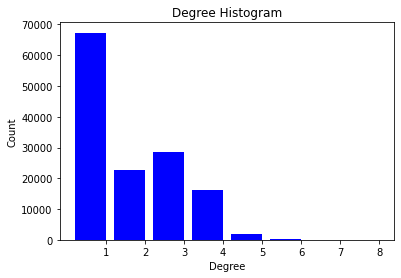

In [15]:
for g in gfs:
            d_prob = []
            d = calc_histDeg(g)
            d_prob = dens_prob(d)
            me, etr, enr, ctr = metrics_rc(d_prob)
            m_aux = [me, etr, enr, ctr]
            g_metric += m_aux

In [16]:
gc.collect()

3482

In [17]:
g_metric

[0.9995, 1.869280038356331, 0.32768707, 2.3263000000000003]

In [ ]:
for dirname, _, filenames in os.walk("E:/DataSetCovid/COVID-19_Radiography_Dataset/COVID/"):
    for filename in filenames:
        print(filename)

In [19]:
me,etr,enr,ctr

(0.9995, 1.869280038356331, 0.32768707, 2.3263000000000003)

In [20]:
df = pd.DataFrame()  

In [21]:
dict_values = {"me":[],"etr":[],"enr":[],"ctr":[],"class":[]};

In [22]:
dict_values

{'me': [], 'etr': [], 'enr': [], 'ctr': [], 'class': []}

In [23]:
dict_values["me"].append(1)
dict_values["etr"].append(2)
dict_values["enr"].append(3)
dict_values["ctr"].append(4)
dict_values["class"].append(5)

In [24]:
dict_values

{'me': [1], 'etr': [2], 'enr': [3], 'ctr': [4], 'class': [5]}

In [25]:
dict_values = {"me":[],"etr":[],"enr":[],"ctr":[],"class":[]};

In [26]:
for dirname, _, filenames in os.walk("E:/DataSetCovid/COVID-19_Radiography_Dataset/COVID/"):
    for filename in filenames:
        print(filename)
        break


COVID-1.png


In [27]:
 g_metric = []

Shape(299, 299)
Iniciando o grafo da secção 1 ...
Iniciando calculo dos pesos...
Calculo dos pesos finalizado.
Iniciando a o desenho do grafo...
oi


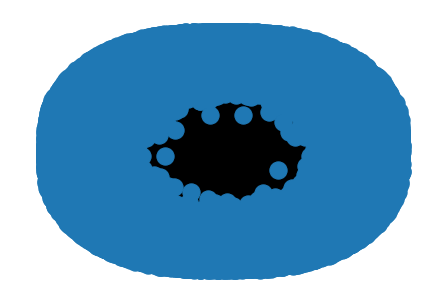

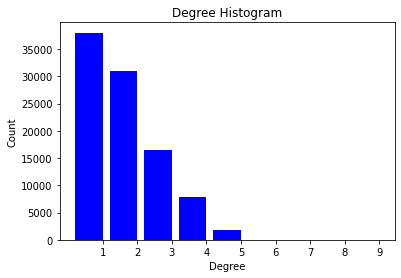

In [28]:
sections = load_img("E:/DataSetCovid/COVID-19_Radiography_Dataset/COVID/COVID-10.png")
gfs = calc_weights_default(sections)
for g in gfs:
    d_prob = []
    d = calc_histDeg(g)
    d_prob = dens_prob(d)
    me, etr, enr, ctr = metrics_rc(d_prob)
    m_aux = [me, etr, enr, ctr]
    g_metric += m_aux

In [29]:
g_metric

[1.0003, 1.909945182980235, 0.30237133, 2.0927000000000002]

In [30]:
g_metric

[1.0003, 1.909945182980235, 0.30237133, 2.0927000000000002]

In [31]:
#dict_values = {"me":[],"etr":[],"enr":[],"ctr":[],"class":[]};

COVID-1.png
Shape(299, 299)
Iniciando o grafo da secção 1 ...
Iniciando calculo dos pesos...
Calculo dos pesos finalizado.
Iniciando a o desenho do grafo...
oi


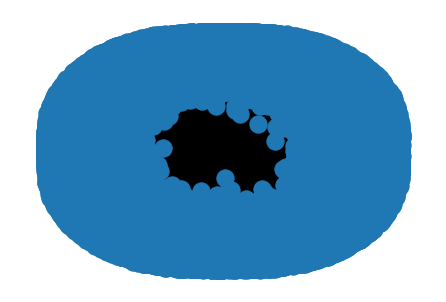

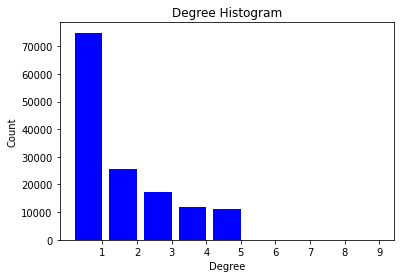

In [32]:
dict_values = {"me":[],"etr":[],"enr":[],"ctr":[],"class":[]};
for dirname, _, filenames in os.walk("E:/DataSetCovid/COVID-19_Radiography_Dataset/COVID/"):
    for filename in filenames:
        parar =0
        g_metric = []
        print(filename)
        sections = load_img("E:/DataSetCovid/COVID-19_Radiography_Dataset/COVID/"+filename)
        gfs = calc_weights_default(sections)
        for g in gfs:
            d_prob = []
            d = calc_histDeg(g)
            d_prob = dens_prob(d)
            me, etr, enr, ctr = metrics_rc(d_prob)
            m_aux = [me, etr, enr, ctr]
            g_metric += m_aux
        dict_values["me"].append(g_metric[0])
        dict_values["etr"].append(g_metric[1])
        dict_values["enr"].append(g_metric[2])
        dict_values["ctr"].append(g_metric[3])
        dict_values["class"].append("Covid")
        parar = parar + 1
        break
df_covid = pd.DataFrame.from_dict(dict_values)
df_covid.to_csv('df_covid_________________.csv')

Normal-1.png
Shape(299, 299)
Iniciando o grafo da secção 1 ...
Iniciando calculo dos pesos...
Calculo dos pesos finalizado.
Iniciando a o desenho do grafo...


KeyboardInterrupt: 

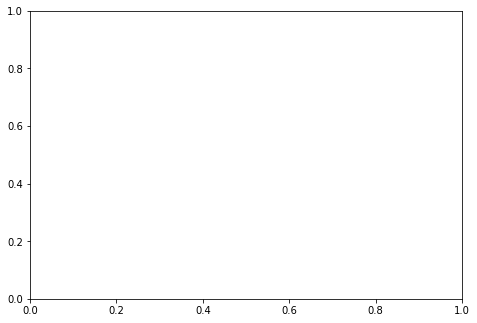

In [33]:
dict_values = {"me":[],"etr":[],"enr":[],"ctr":[],"class":[]};
for dirname, _, filenames in os.walk("E:/DataSetCovid/COVID-19_Radiography_Dataset/Normal/"):
    for filename in filenames:
        parar =0
        g_metric = []
        print(filename)
        sections = load_img("E:/DataSetCovid/COVID-19_Radiography_Dataset/Normal/"+filename)
        gfs = calc_weights_default(sections)
        for g in gfs:
            d_prob = []
            d = calc_histDeg(g)
            d_prob = dens_prob(d)
            me, etr, enr, ctr = metrics_rc(d_prob)
            m_aux = [me, etr, enr, ctr]
            g_metric += m_aux
        dict_values["me"].append(g_metric[0])
        dict_values["etr"].append(g_metric[1])
        dict_values["enr"].append(g_metric[2])
        dict_values["ctr"].append(g_metric[3])
        dict_values["class"].append("Normal")
        parar = parar + 1
        
df_normais = pd.DataFrame.from_dict(dict_values)
df_normais.to_csv('df_normais.csv')

In [ ]:
newdf = pd.DataFrame.from_dict(dict_values)

In [ ]:
newdf

In [ ]:
G = nx.complete_graph(5)
nx.draw(G)

In [ ]:
G

In [ ]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(100, 200), range(100)], with_labels=True, font_weight='bold')